In [1]:
import numpy as np
import scipy as sp
from scipy.sparse.linalg import norm


def source_function( x, y ):
    if ( x >= 0.1 and x <= 0.3 and y >= 0.1 and y <= 0.3 ):
        return 1.0
    else:
        return 0.0

# Finds the index k = 0,1,2,...,N-1 in the vector corresponding to the grid
# point (x_i, y_j) where i,j = 0,1,2,...,n-1

def indexFD(i, j, n):
  k = ( i*n + j )
  return k

def reverseIndexFD(k, n):
    i = k // n
    j = k % n
    return i, j


def boundaryConditions(n):

  extNodes = []

  # Find nodes at the boundary of the square
  for j in range(0,n):
    extNodes.append( indexFD(j,0,n) )
    extNodes.append( indexFD(j,n-1,n) )
    extNodes.append( indexFD(0,j,n) )
    extNodes.append( indexFD(n-1,j,n) )

  extNodes = np.unique(extNodes)
  intNodes = np.setdiff1d(np.arange(0,n**2), extNodes);

  return intNodes, extNodes

def diffusionMatrix( mux, muy, h ):
  n = int(1./h + 1)
  N = n**2
  A = sp.sparse.lil_array((N, N), dtype=np.float64)

  # Pass through all grid points and apply local stencil

  stencil = np.array([(mux+muy)*2., -mux*1., -mux*1., -muy*1., -muy*1.]) / h**2

  # Loop over each internal node in the grid, i,j = 1,2,...,n-2
  for i in range(1,n-1):
    for j in range(1,n-1):
      # Find k-indices of the four neighbouring nodes
      localStencilIndices = np.array([indexFD(i,j,n), indexFD(i+1,j,n), indexFD(i-1,j,n), indexFD(i,j+1,n), indexFD(i,j-1,n)])

      # Add the local stencil for node (x_i,y_j) to the matrix
      currentRow = indexFD(i,j,n)
      for m in range (0,5):
        A[currentRow, localStencilIndices[m]] = A[currentRow, localStencilIndices[m]] + stencil[m]

  # After the matrix A has been assembled, we convert it to the column-major format
  # for more efficient computations
  A = A.tocsc()

  return (A)



/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import numpy as np
# import scipy as sp
# from scipy.sparse.linalg import norm
# import matplotlib.pyplot as plt


# # Your provided functions: source_function, indexFD, reverseIndexFD, boundaryConditions, diffusionMatrix

# # Initialize parameters
# h = 0.1
# mux = 1
# muy = 1
# n = int(1./h + 1)
# N = n**2
# drop_tol = 0.1
# intNodes, extNodes = boundaryConditions(n)
# # Generate diffusion matrix
# A = diffusionMatrix(mux, muy, h)
# A_int = A[intNodes][:, intNodes]

# # Create ILU preconditioner
# Mx = sp.sparse.linalg.spilu(A_int, drop_tol=drop_tol)

# fig, ax0 = plt.subplots(1, 1)
# ax0.spy(A_int.toarray())
# plt.show()

# fig, ax = plt.subplots(1, 3)
# ax1 = ax[0]
# ax2 = ax[1]
# ax3 = ax[2]
# U = Mx.U
# L = Mx.L
# M = L@U

# cax1 = ax1.spy(A_int.toarray())
# ax1.set_title("Sparsity pattern")

# ax2.spy(U)
# ax2.set_title("(U)")

# ax3.spy(L)
# ax3.set_title("(L)")
# plt.show()

# # Define source term and initialize vectors
# b = np.zeros(N, dtype=np.float64)
# for k in range (0,N):
#     i, j = reverseIndexFD(k, n)
#     b[k] = source_function( i*h, j*h )
# b_int = b[intNodes]

# sol = np.zeros_like(b)
# x = np.zeros_like(b_int)  # Initial guess
# ax = (A_int@x)
# r = b_int - (A_int@x)  # Initial residual
# z = M@r  # Apply preconditioner
# d = z.copy()
# tol = 1e-6  # Convergence tolerance
# maxiter = 1000  # Maximum number of iterations

# # Start iterations
# for iteration in range(maxiter): 
#     alpha = (r@z) / (d.T@A_int@d)
#     x += alpha * d
#     r_new = r - alpha * (A_int@d)
#     z_new = M@r_new
    
#     # Check for convergence
#     if np.linalg.norm(r_new) < tol and iteration >= 1:
#         print(f"Solution converged in {iteration} iterations.")
#         break

#     beta = (r_new@z_new) / (r@z)
#     d = z_new + beta * d
#     r = r_new
#     z = z_new
# print(f'Final Iteration = {iteration}, Norm = {np.linalg.norm(r_new)}')

# if np.linalg.norm(r_new) >= tol:
#     print("Solution did not converge.")

# sol[intNodes] = x


In [3]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator
# import matplotlib.patches as patches

# fig, ax = plt.subplots()
# h = 0.1
# # Make data.
# X = np.arange(0., 1.+h, h)
# Y = np.arange(0., 1.+h, h)
# X, Y = np.meshgrid(X, Y)
# Z = sol.reshape(int(1./h+1),int(1./h+1))

# # Plot the surface.
# surf = ax.pcolor(X, Y, Z[:-1,:-1], shading='flat', cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# # Create a Rectangle patch
# rect = patches.Rectangle((0.1, 0.1), 0.2, 0.2, linewidth=1, edgecolor='k', facecolor='none')

# # Add the patch to the Axes
# ax.add_patch(rect)

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
# hx = 0.1
# # Add a grid
# plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.2)
# plt.minorticks_on()
# plt.grid(which='minor', axis='both', linestyle='-', color='k', linewidth=0.2)
# major_ticks = np.arange(0., 1.+hx, hx)
# minor_ticks = np.arange(0., 1.+hx, hx/5)

# plt.xticks(major_ticks)
# plt.yticks(major_ticks)
# plt.show()

In [4]:
import numpy as np
import scipy as sp
from scipy.sparse.linalg import norm
import matplotlib.pyplot as plt


def myPCG( A, b, L, U, tol, maxit ):
    #A is the matrix produced by diffusionMatrix
    #b is the RHS calculated by the source function
    #L and U are the factors of the preconditioner from spilu
    #tol is the tolerance for the residual
    # maxit is the maximum number of iterations

    # Initialize parameters
    M = (L @ U)
    x = np.zeros_like(b)  # Initial guess
    r0 = b - (A@x)  # Initial residual
    z0 = sp.sparse.linalg.spsolve(M,r0)  # Apply preconditioner
    d0 = z0.copy()

    for i in range(maxit):
        alpha = (r0@z0) / (d0.T@A@d0)
        x += alpha * d0
        r1 = r0 - alpha * (A@d0)
        z1 = sp.sparse.linalg.spsolve(M,r1)

        # Check for convergence
        if np.linalg.norm(r1) < tol and i > 0:
            print(f"Converged in {i} iterations, Norm = {np.linalg.norm(r1)}")
            return x

        beta = (r1 @ z1) / (r0 @ z0)
        d0 = z1 + beta * d0
        r0, z0 = r1, z1
        
    print(f'Final Iteration = {i}, Norm = {np.linalg.norm(r1)}')
    if np.linalg.norm(r1) >= tol:
        print("Solution did not converge.")

    return x




In [8]:
import numpy as np
import scipy as sp
from scipy.sparse.linalg import norm
import matplotlib.pyplot as plt


# Your provided functions: source_function, indexFD, reverseIndexFD, boundaryConditions, diffusionMatrix

h = 0.02
mux = 1
muy = 1
n = int(1./h + 1)
N = n**2
drop_tol = 1
tol = 1e-6
maxit = 10000
intNodes, extNodes = boundaryConditions(n)

# Generate diffusion matrix
A = diffusionMatrix(mux, muy, h)
A_int = A[intNodes][:, intNodes]

# Create ILU preconditioner using scipy
M = sp.sparse.linalg.spilu(A_int, drop_tol=drop_tol)
L = M.L
U = M.U

# Define source term and initialize vectors
b = np.zeros(N, dtype=np.float64)
for k in range (0,N):
    i, j = reverseIndexFD(k, n)
    b[k] = source_function( i*h, j*h )
b_int = b[intNodes]

sol = np.zeros_like(b)
sol[intNodes] = myPCG(A_int,b_int,L,U,tol,maxit)


Converged in 183 iterations, Norm = 9.779036239493966e-07


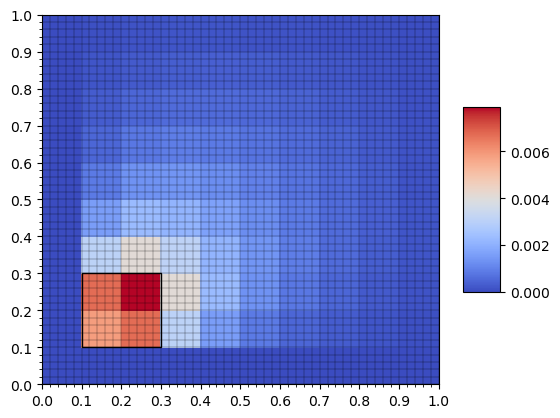

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.patches as patches

fig, ax = plt.subplots()
# Make data.
X = np.arange(0., 1.+h, h)
Y = np.arange(0., 1.+h, h)
X, Y = np.meshgrid(X, Y)
Z = sol.reshape(int(1./h+1),int(1./h+1))

# Plot the surface.
surf = ax.pcolor(X, Y, Z[:-1,:-1], shading='flat', cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Create a Rectangle patch
rect = patches.Rectangle((0.1, 0.1), 0.2, 0.2, linewidth=1, edgecolor='k', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
hx = 0.1
# Add a grid
plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.2)
plt.minorticks_on()
plt.grid(which='minor', axis='both', linestyle='-', color='k', linewidth=0.2)
major_ticks = np.arange(0., 1.+hx, hx)
minor_ticks = np.arange(0., 1.+hx, hx/5)

plt.xticks(major_ticks)
plt.yticks(major_ticks)
plt.show()